In [16]:
import numpy as np
from random import *

# Set up environment

In [17]:
####################
# Helper Functions #
####################

def accumulate(fn, initial, seq):
    if not seq:
        return initial
    else:
        return fn(seq[0], 
                  accumulate(fn, initial, seq[1:]))
    
def flatten(mat):
    return [num for row in mat for num in row]

def has_zero(mat):
    return 0 in flatten(mat)

def transpose(mat):
    return list(map(list,zip(*mat)))

# Before Transpose:
# 1 2 3 4
# 5 6 7 8
# 9 10 11 12
# 13 14 15 16

# After Transpose
# 1 5 9 13
# 2 6 10 14
# 3 7 11 15
# 4 8 12 16


def reverse(mat):
    return list(map(lambda row: list(reversed(row)),mat))

# Before Reverse:
# 1 2 3 4
# 5 6 7 8
# 9 10 11 12
# 13 14 15 16

# After Reverse
# 4 3 2 1
# 8 7 6 5
# 12 11 10 9
# 16 15 14 13


###################
# Game Matrix ADT #
###################

def new_game_matrix(n):
    matrix = []
    for i in range(n):
        matrix.append([0] * n)
    return matrix


def add_two(mat):
    if not has_zero(mat):
        return mat
    a = randint(0, len(mat)-1)
    b = randint(0, len(mat)-1)
    while mat[a][b] != 0:
        a = randint(0, len(mat)-1)
        b = randint(0, len(mat)-1)
    mat[a][b] = 2
    return mat

def game_status(mat):
#     for row in mat:
#         for element in row:
#             if element == 8192:
#                 return 'win'

    if has_zero(mat):
        return 'not over'
    for i in range(len(mat)): #Check horizontally
        for j in range(len(mat[0])-1):
            if mat[i][j] == mat[i][j+1]:
                return 'not over'
    for i in range(len(mat)-1): #Check vertically
        for j in range(len(mat[0])):
            if mat[i][j] == mat[i+1][j]:
                return 'not over'
    return 'lose'

def merge_left(matrix):
    def merge_row(row):
        merged_row, prev_tile, score_increment = [], 0, 0
        # pack element by element left-wards
        for tile in row:
            if tile == 0: continue
            if prev_tile == 0:
                prev_tile = tile
            elif prev_tile != tile:
                merged_row.append(prev_tile)
                prev_tile = tile
            else:
                merged_row.append(prev_tile*2)
                score_increment += prev_tile*2
                prev_tile = 0
        merged_row.append(prev_tile) # valid regardless whether there are merges or not
        # top up zeros
        while len(merged_row) != len(row):
            merged_row.append(0)
        return (merged_row, merged_row != row, score_increment)

    return accumulate(lambda first, rest: ([first[0]] + rest[0], 
                                            first[1] or rest[1], 
                                            first[2] + rest[2]),
                      ([], False, 0),
                      list(map(merge_row, matrix)))

def merge_right(mat):
    mat, valid, score = merge_left(reverse(mat))
    return (reverse(mat), valid, score)

def merge_up(mat):
    mat, valid, score = merge_left(transpose(mat))
    return (transpose(mat), valid, score)

def merge_down(mat):
    mat, valid, score = merge_left(reverse(transpose(mat)))
    return (transpose(reverse(mat)), valid, score)


###################
# Game Record ADT #
###################
                
def make_new_record(mat, score):
    return (mat, score)
def get_record_matrix(record):
    return record[0]
def get_record_score(record):
    return record[1]


####################
# Game Records ADT #
####################

def new_records():
    return []
def add_record(new_record, records):
    NUM_OF_UNDOS = 3
    records.append(new_record)
    if num_of_records(records) > NUM_OF_UNDOS:
        records = records[-NUM_OF_UNDOS:]
    return records
def num_of_records(records):
    return len(records)
def is_empty(records):
    return num_of_records(records) <= 0
def pop_last_record(records):
    if not is_empty(records):
        last_record = records.pop()
        return (get_record_matrix(last_record),
                get_record_score(last_record),
                records)
    else:
        return (None, None, records)

##################
# Game State ADT #
##################

def make_state(matrix, total_score, history):
    return (matrix, total_score, history)
def get_matrix(state):
    return state[0]
def get_score(state):
    return state[1]
def get_history(state):
    return state[2]
def make_new_game(n):
    starting_matrix = add_two(add_two(new_game_matrix(n)))
    return make_state(starting_matrix, 0, new_records())

def execute_move(state, matrix_updater):   
    current_score = get_score(state)
    next_matrix, valid_move, score_increment = matrix_updater(get_matrix(state))
    if not valid_move:
        return (state, False)
    else:
        updated_history = ()
        updated_state = make_state(add_two(next_matrix),
                                   current_score + score_increment,
                                   updated_history)
        return (updated_state, True)
def left(state):
    return execute_move(state, merge_left)
def right(state):
    return execute_move(state, merge_right)
def up(state):
    return execute_move(state, merge_up)
def down(state):
    return execute_move(state, merge_down)

def undo(state):
    records = get_history(state)
    matrix, score, records = pop_last_record(records)
    if matrix:
        return (make_state(matrix, score, records), True)
    else:
        return (state, False)    

game_logic = {
    'make_new_game': make_new_game,
    'game_status': game_status,
    'get_score': get_score,
    'get_matrix': get_matrix,
    'up': up,
    'down': down,
    'left': left,
    'right': right,
    'undo': undo
}

# Board State Printing Helper Function

In [18]:
import seaborn as sns
import matplotlib.pyplot as plt

def printboardstate(boardstate):
    mat, score, _ = boardstate
    sns.heatmap(mat, annot = True, 
            square = True, cbar = False, cmap = 'YlOrBr', fmt = 'd')
    plt.title('Game State with Score ' + str(score))
    plt.axis('off')
    plt.show()

# Random AI

In [19]:
def random_move(current_state):
    index = np.random.randint(4)
    return ["up", "down", "left", "right"][index]

Initial state:


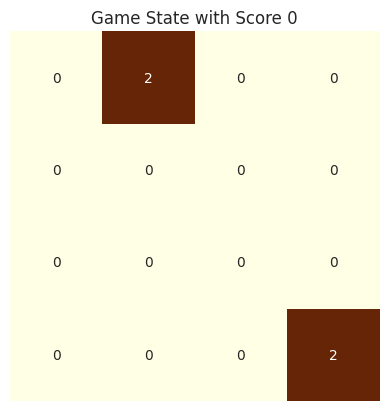

Final state:


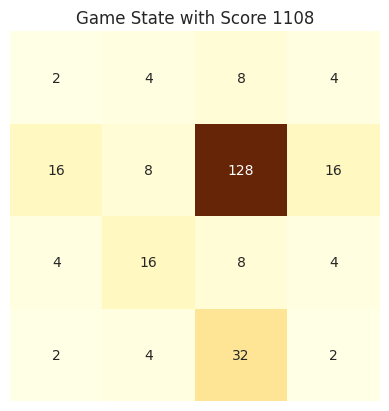

In [20]:
current_state = make_new_game(4)

print('Initial state:')
printboardstate(current_state)

while game_status(get_matrix(current_state)) == "not over":
    best_move = random_move(current_state)
    best_move = game_logic[best_move]
    current_state, _ = best_move(current_state)
    
print('Final state:')
printboardstate(current_state)

# Monte Carlo AI

In [21]:
def playthrough(gamestate, num_tries, max_depth):
    ''' Takes in a game state, and plays randomly till the end num_tries times, returns the final score '''
    score = 0
    for i in range(num_tries):
        newstate = gamestate
        depth = 0
        while game_status(get_matrix(newstate)) == "not over" and depth<max_depth:
            best_move = random_move(newstate)
            best_move = game_logic[best_move]
            newstate, _ = best_move(newstate)
            
            depth += 1
        score += newstate[1]
    
    return score/num_tries

# Monte Carlo Tree Search based AI

Initial state:


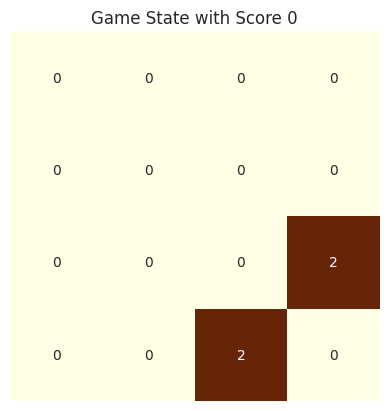

Score:
0 4 8 16 16 20 20 24 36 52 56 64 68 68 72 80 80 84 104 104 136 140 148 152 164 180 180 184 192 192 196 200 200 204 212 216 220 228 244 276 280 288 308 308 312 324 324 328 392 396 396 400 408 432 468 472 472 476 488 496 496 500 500 516 520 528 536 536 540 548 568 600 664 792 796 808 824 828 828 832 836 852 868 900 904 912 916 920 928 932 952 952 956 956 960 968 968 972 980 984 984 988 996 1012 1016 1028 1044 1080 1152 1156 1160 1160 1160 1164 1172 1172 1192 1228 1236 1240 1240 1244 1252 1256 1256 1260 1268 1284 1292 1300 1316 1316 1320 1328 1332 1336 1348 1364 1396 1460 1588 1848 1856 1860 1864 1868 1868 1872 1880 1896 1932 1940 1944 1952 1956 1960 1968 1984 1988 1992 1996 1996 2000 2008 2024 2024 2060 2124 2132 2136 2144 2148 2148 2172 2180 2180 2184 2188 2196 2212 2216 2224 2228 2232 2240 2244 2244 2248 2248 2252 2260 2260 2280 2288 2324 2344 2376 2440 2568 2572 2580 2584 2588 2600 2608 2628 2628 2628 2632 2636 2644 2644 2664 2708 2708 2712 2720 2724 2728 2736 2756 2756 2756 27

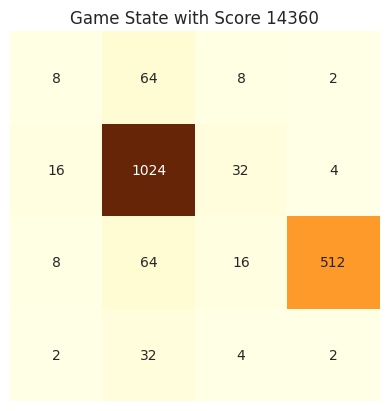

In [22]:
initial_state = make_new_game(4)

print('Initial state:')
printboardstate(initial_state)

debug = False

initial_tries = 20
num_tries = 1
max_depth = 1

indextomove = {0: 'up', 1: 'down', 2: 'left', 3: 'right'}
movetoindex = {'up': 0, 'down': 1, 'left': 2, 'right': 3}

current_state = initial_state
print('Score:')
while game_status(get_matrix(current_state)) == "not over":
    # Only evaluate for valid moves
    bestscore = -1
    bestmove = ""
    validmoves = []

    action_score = np.array([0, 0, 0, 0])
    action_tries = np.array([0, 0, 0, 0])

    exploration_tries, exploration_score = 0, 0

    maxscore = 0

    for move in ['up', 'down', 'left', 'right']:
        _, valid = game_logic[move](current_state)
        if valid: validmoves.append(move)
        # if not valid, still increment the initial tries variable for that move to avoid division by 0
        else:
            action_tries[movetoindex[move]] = initial_tries
            action_score[movetoindex[move]] = -1000000
            continue

        # do an initial exploration of each valid move
        for tries in range(initial_tries):
            # perform monte carlo simulation for that move
            montecarlo_state, _ = game_logic[move](current_state)
            montecarlo_score = playthrough(montecarlo_state, 1, max_depth)

            # add the score and tries to the action node
            maxindex = movetoindex[move]
            action_tries[maxindex] += 1
            action_score[maxindex] += montecarlo_score

#             exploration_tries += 1
#             exploration_score += montecarlo_score

            maxscore = max(maxscore, montecarlo_score)

    # we peg the exploration constant to the average montecarlo score of the initial trials
    c = maxscore
#     c = 10

    for totaltries in range(num_tries):

        # perform an explore-exploit tradeoff calculation to find out which move to go first
        action_heuristic = action_score/action_tries + c*np.sqrt(np.log(totaltries+1)/action_tries)

#         print(action_heuristic)
#         print(np.sqrt((totaltries+1)/action_tries))
#         print('Exploration',c*np.sqrt(np.log(totaltries+1)/action_tries))

        maxindex = np.argmax(action_heuristic)
        move = indextomove[maxindex]

        # perform monte carlo simulation for that move
        montecarlo_state, _ = game_logic[move](current_state)
        montecarlo_score = playthrough(montecarlo_state, 1, max_depth)

        # add the score and tries to the action node
        action_tries[maxindex] += 1
        action_score[maxindex] += montecarlo_score


    if debug:
        print('Exploration Factor', c)
        print('Number of tries', action_tries)
        print('Average score', action_score/action_tries)


    # best move is the highest score
#     bestmoveindex = np.where(action_tries == max(action_tries))[0][0]
    bestmoveindex = np.argmax(action_score/action_tries)
    bestmove = indextomove[bestmoveindex]

    # do the move with the highest score
    current_state, _ = game_logic[bestmove](current_state)

    if debug:
        print('Best move:', bestmove)
    print(current_state[1], end = ' ')

print('Final state:')
printboardstate(current_state)